In [25]:
import matplotlib.pyplot as plt
from typing import List, Dict
import numpy as np
import pandas as pd
import json
import os

In [26]:
DPI=300 # 300

In [27]:
root_directory = os.path.dirname("../")
logs_directory = os.path.join(root_directory, "logs")
current_dir = os.path.dirname(".")
plots_directory = os.path.join(current_dir, "plots")
logs_to_include = ["logs_2024-05-05T12:49:50"] # Logs to include in the analysis
#logs_to_include = [name for name in os.listdir(logs_directory) if os.path.isdir(os.path.join(logs_directory, name))]

## Throughput

In [28]:
def create_dicts(nb_paths: int, impl: str, runs: List[float]):
    to_return = []
    for run in runs:
        to_return.append({"nb_paths": nb_paths, "implementation": impl, "throughput": run})
    return to_return

In [29]:
df = pd.DataFrame(columns=["nb_paths", "throughput", "implementation"])
data_to_append = []
mpquic_one_path = [
    3571.5849799400175,
    3851.90236190128,
    3711.3602959597615,
    3682.2290627514576,
    3700.392779540713,
    3961.6625655309094,
    3808.592679118469,
    3792.8567170840224,
    3712.597394767379,
    3740.2032345131797
]
data_to_append.extend(create_dicts(2, "mpquic", mpquic_one_path))

mcmpquic_one_path = [
    6777.364014344771,
    6278.017005896367,
    5645.2543394292525,
    6162.480004300683,
    5946.966199119053,
    6942.472641711872,
    5579.0115039422335,
    6172.459555899234,
    6651.519510479959,
    6462.759806632856
]
data_to_append.extend(create_dicts(2, "mcmpquic", mcmpquic_one_path))

mpquic_two_paths = [
    3435.00171991086,
    3283.272841016264,
    3714.2138278393054,
    3406.7094602030993,
    3562.171767633024
]
data_to_append.extend(create_dicts(4, "mpquic", mpquic_two_paths))

mcmpquic_two_paths = [
    10991.99860012002,
    9053.760698529659,
    8456.291728400956,
    11394.199214382887,
    11614.350993750955
]
data_to_append.extend(create_dicts(4, "mcmpquic", mcmpquic_two_paths))
throughput_df = pd.concat([df, pd.DataFrame(data_to_append)], ignore_index=True)

In [30]:
throughput_df

,nb_paths,throughput,implementation
0,2,3571.584980,mpquic
1,2,3851.902362,mpquic
2,2,3711.360296,mpquic
3,2,3682.229063,mpquic
4,2,3700.392780,mpquic
5,2,3961.662566,mpquic
6,2,3808.592679,mpquic
7,2,3792.856717,mpquic
8,2,3712.597395,mpquic
9,2,3740.203235,mpquic


In [31]:
import matplotlib.pyplot as plt
import pandas as pd

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def generate_offset(width: float, number: int) -> List[float]:
    """Generated offsets"""
    if number == 2:
        return [-1 * width / 2, width / 2]
    raise NotImplemented("Implement it")
    # TODO generalize to more number and also odd number
    
def plot_throughput(ax: plt.Axes, df: pd.DataFrame):
    """ Plots the goodput data in a DataFrame. The expected DataFrame should have columns: nb_paths, throughput, implementation
    """
    
    implementations = sorted(list(df["implementation"].unique()), reverse=True)
    all_nb_paths = list(df["nb_paths"].unique())
    all_nb_paths.sort()
    all_nb_paths = np.array(all_nb_paths)
    colors = ["blue", "red", "green", "orange"]
    next_index = 0
    max_observed = 0
    box_width = 0.4
    offsets = generate_offset(box_width, len(implementations))
    
    for implementation in implementations:
        df_impl = df[df["implementation"] == implementation]
        subboxplot_data = []
        for filesize in all_nb_paths:
            goodput_values = df_impl[df_impl["nb_paths"] == filesize]["throughput"]
            goodput_values = goodput_values.to_numpy()
            subboxplot_data.append(goodput_values)
            max_observed = max(max_observed, max(goodput_values))
        bxp = ax.boxplot(subboxplot_data, positions=all_nb_paths + offsets[next_index], widths=box_width, showfliers=False)
        set_box_color(bxp, colors[next_index])
        next_index += 1
    
    ax.set_xticks(all_nb_paths, all_nb_paths)
    ax.set_xlabel("Number of paths")
    ax.set_ylabel("Throughput [Mbps]")
    ax.grid(which='major', color='black', linewidth=1, alpha=0.3, linestyle="dashed") # Show the major grid
    ax.grid(which='minor', axis="y", color='black', linewidth=0.6, alpha=0.3, linestyle="dotted") # Show the major grid
    ax.set_ylim(0, max_observed * 1.02)
    
    for i in range(next_index):
        ax.plot([], c=colors[i], label=implementations[i])
    ax.legend()    
    ax.minorticks_on() # Make the minor ticks and gridlines show
    ax.tick_params(axis='x', which='minor', bottom=False) # Disable the minor ticks on the x-axis

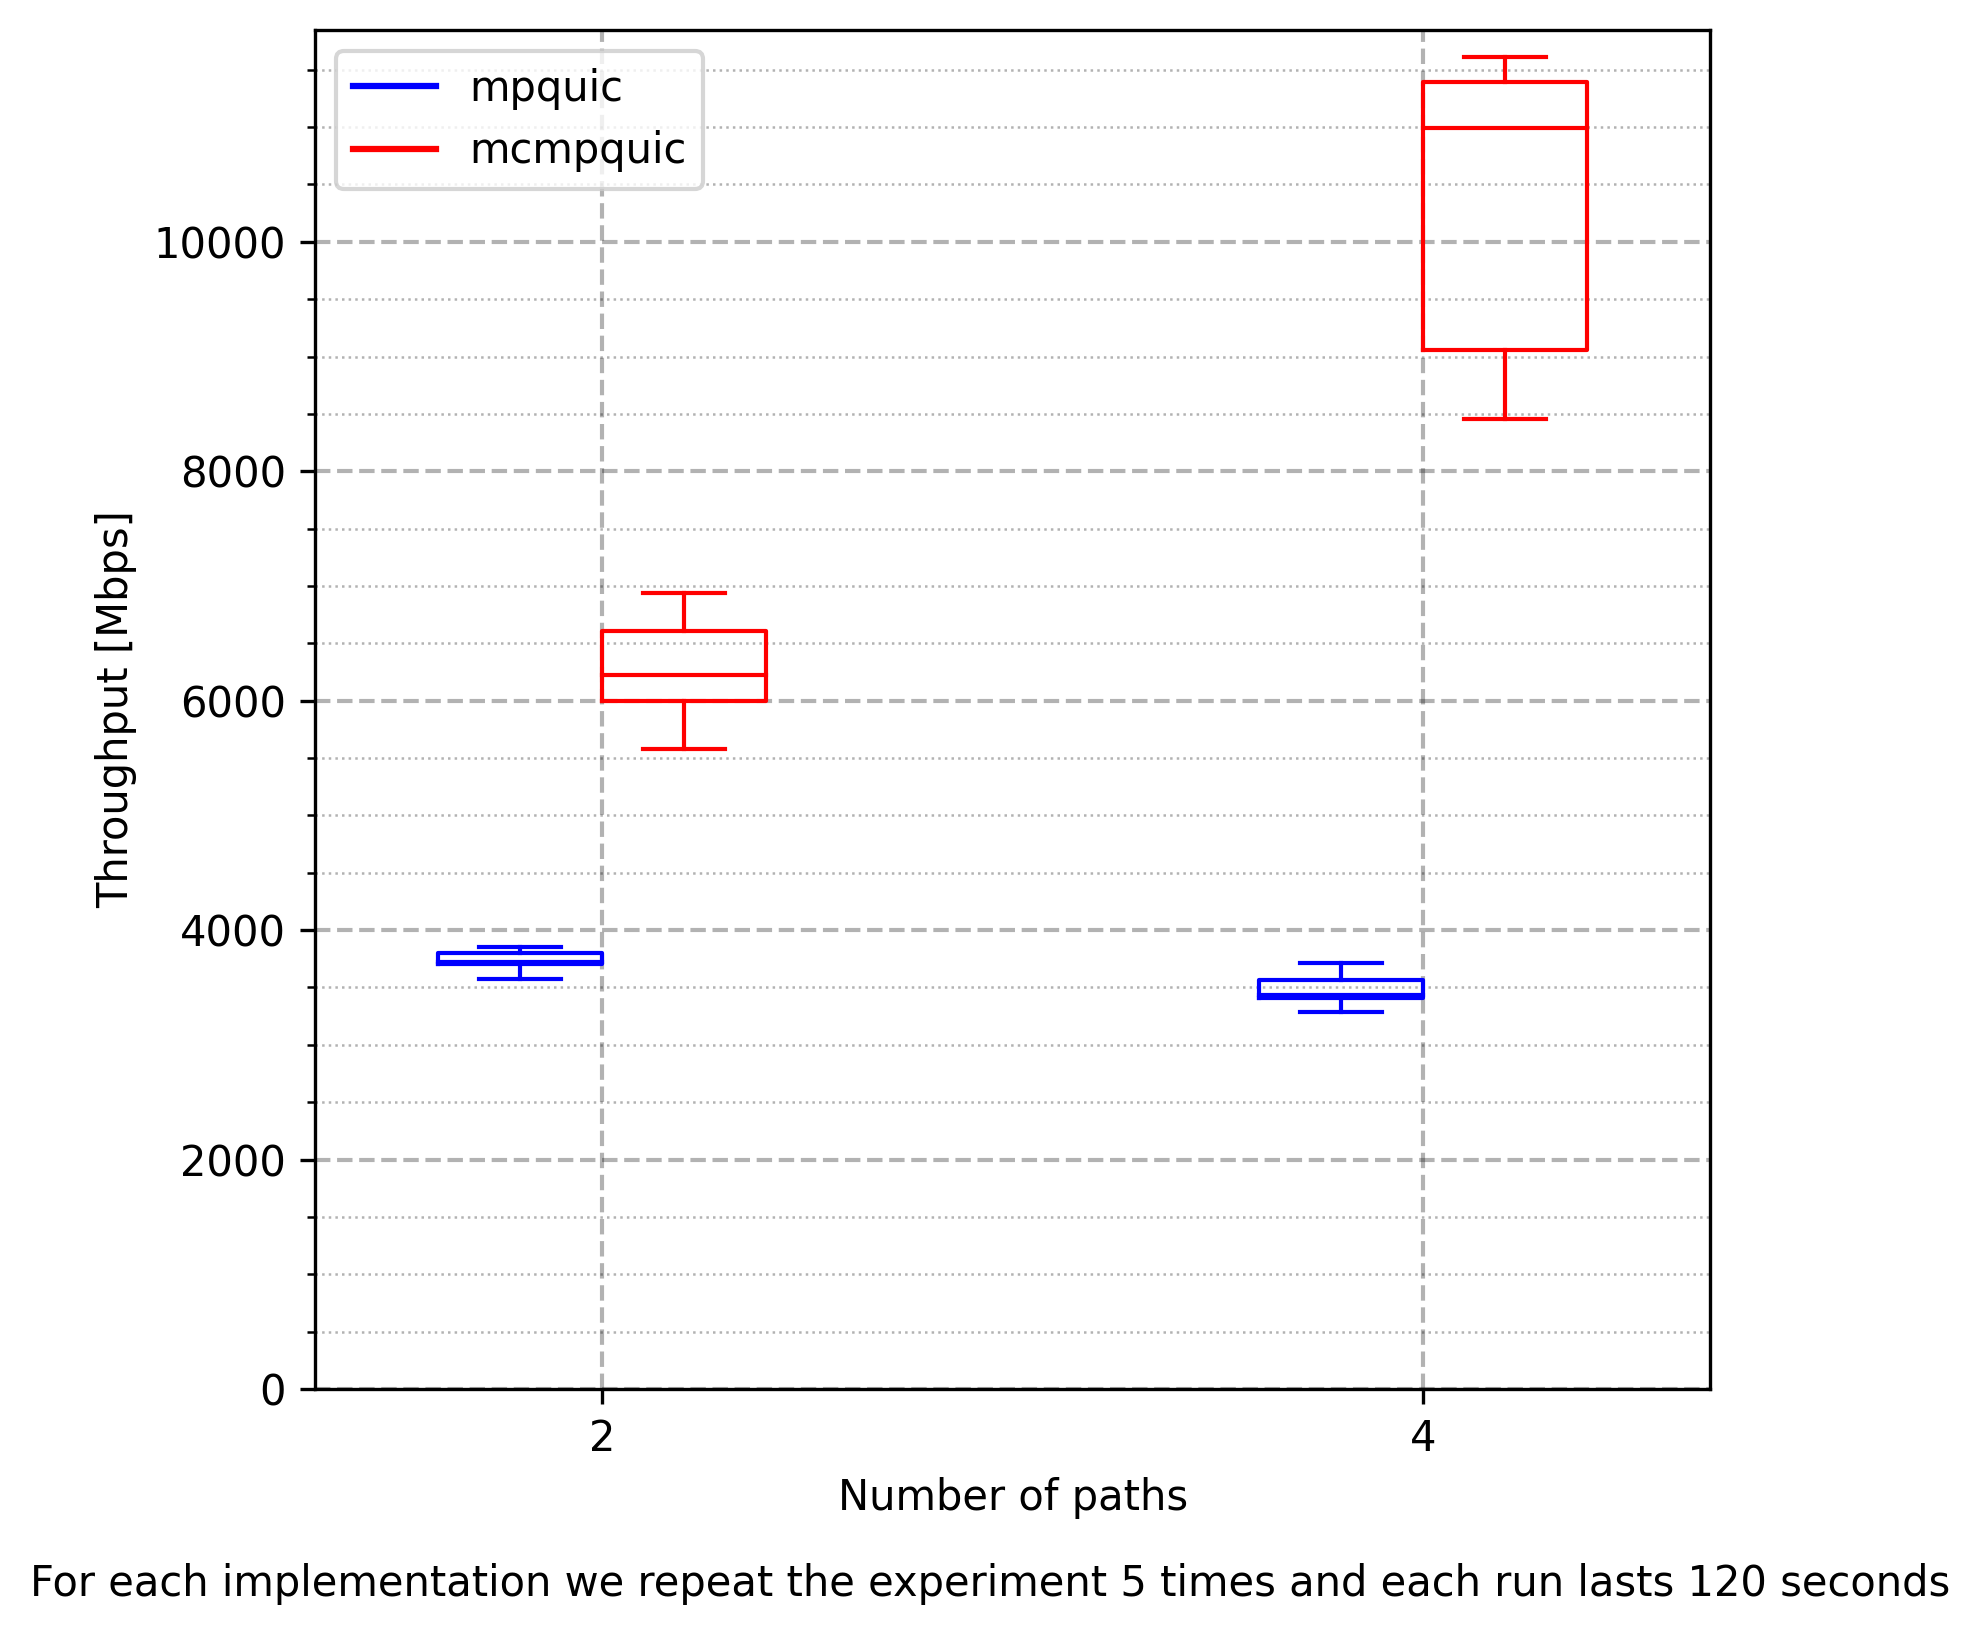

In [32]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(6, 6), dpi=DPI)
plot_throughput(ax, throughput_df.copy())
#ax.set_title("Throughput of the different implementations on the cloudlab testbed")
fig.text(.5, .01, "For each implementation we repeat the experiment 5 times and each run lasts 120 seconds", ha='center')
plt.savefig(os.path.join(plots_directory, "custom_throughput_impl_boxplot_120.pdf"), format="pdf", bbox_inches="tight")
plt.savefig(os.path.join(plots_directory, "custom_throughput_impl_boxplot_120.svg"), format="svg", bbox_inches="tight")
plt.show()